In [1]:
import pandas as pd

df = pd.read_csv("Final_Dataset.csv")

In [2]:
sbert_score = df['SBERT Score'].values
simcse_score = df['Sim_CSE Score'].values
hf_score = df['HF_Score'].values

In [3]:
import matplotlib.pyplot as plt

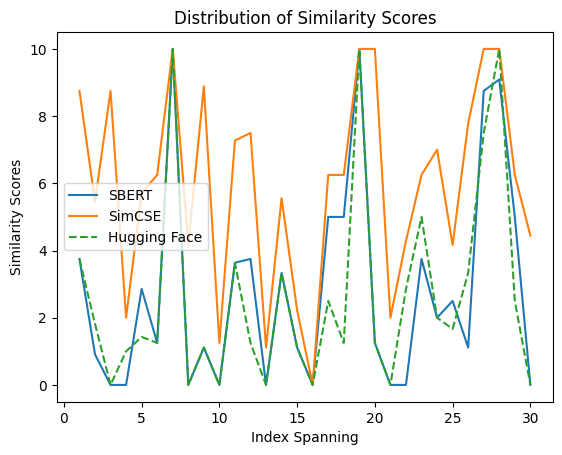

In [4]:
# Score Spanning
import numpy as np
x = np.arange(1, 31)

plt.plot(x, sbert_score[0: 30], label="SBERT")
plt.plot(x, simcse_score[0: 30], label = "SimCSE")
plt.plot(x, hf_score[0: 30], label="Hugging Face", linestyle="--")
plt.xlabel("Index Spanning")
plt.ylabel("Similarity Scores")
plt.title("Distribution of Similarity Scores")
plt.legend()
plt.show()

In [5]:
# import pandas as pd
# df = pd.read_csv("Keyword_Test_Dataset.csv")

In [5]:
df.head()

,S. No,Question,Model Answer,User Answer,keybert_keys_sentence1,keybert_keys_sentence2,yake_keys_sentence1,yake_keys_sentence2,keybert_score,yake_score,Sim_CSE Score,SBERT Score,HF_Score,Score_camembert,Score_NLTK,Score_spacy,Actual Score (0-10)
0,1,What is an Operating Systems?Why do we need an...,an operating system os is a collection of soft...,an operating system is a program that acts as ...,"[('os', 0.5709), ('operating', 0.3746), ('soft...","[('os', 0.5634), ('operating', 0.4578), ('soft...","[('computer', 0.014082021907517523), ('operati...","[('computer', 0.01460579215540396), ('operatin...",7.928716,6.580460,8.750000,3.750000,3.750000,0.0,5.588235,10.0,4.0
1,2,Explain different types of tasks done by OS an...,operating system services and facilites can be...,following are the services provided by an oper...,"[('os', 0.477), ('programs', 0.4362), ('operat...","[('operating', 0.5053), ('security', 0.4239), ...","[('system', 0.01484175578162468), ('operating'...","[('output', 0.03937187525108959), ('device', 0...",5.903012,5.158648,5.454545,0.909091,1.818182,0.0,3.488372,0.0,4.0
2,3,Give the view of OS as a Resource Manager,the concept of an operating system as providin...,from a high-level perspective an operating sys...,"[('os', 0.4752), ('operating', 0.4153), ('prog...","[('os', 0.4744), ('processes', 0.4268), ('oper...","[('system', 0.014646037261204945), ('operating...","[('resources', 0.013877918771042804), ('memory...",7.433753,6.220559,8.750000,0.000000,0.000000,10.0,3.750000,10.0,6.0
3,4,Give the view of OS as an extended machine.,the operating systems perform two basically un...,from another perspective an operating system o...,"[('operating', 0.4447), ('computers', 0.4103),...","[('os', 0.5087), ('operating', 0.371), ('syste...","[('operating', 0.017152339201577816), ('system...","[('system', 0.010976070087257307), ('machine',...",5.428903,4.514964,2.000000,0.000000,1.000000,0.0,3.076923,0.0,4.0
4,5,What is Deadlock Avoidance?,deadlock avoidance is a set of techniques used...,deadlock avoidance is a technique used in oper...,"[('deadlocks', 0.5929), ('deadlock', 0.5799), ...","[('deadlocks', 0.5647), ('deadlock', 0.5587), ...","[('deadlock', 0.013010677940705515), ('system'...","[('process', 0.017118988225377267), ('deadlock...",8.288505,6.202614,5.714286,2.857143,1.428571,10.0,5.555556,10.0,3.0


In [6]:
yake_score = df.iloc[10:20, 9]
keybert_score = df.iloc[10:20, 8]
actual_score = df.iloc[10:20, -1]

In [7]:
import plotly.express as px

fig = px.area(
    x = yake_score,
    y = keybert_score,
    color = actual_score
)

In [8]:
fig.show()

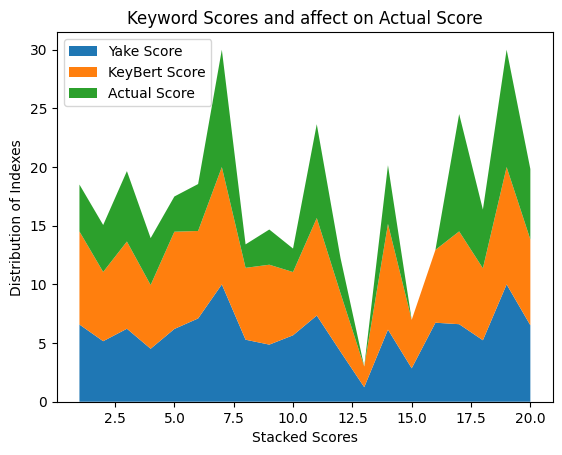

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 21)
y1 = df.iloc[:20, 9]
y2 = df.iloc[:20, 8]
y3 = df.iloc[:20,  -1]

plt.stackplot(
    x, 
    y1, 
    y2, 
    y3,
    labels=['Yake Score', 'KeyBert Score', 'Actual Score']    
)

plt.legend(loc="upper left")
plt.xlabel("Stacked Scores")
plt.ylabel("Distribution of Indexes")
plt.title("Keyword Scores and affect on Actual Score")

plt.show()

In [10]:
yake_freq = [0]*11
keybert_freq = [0]*11

marks = np.arange(0, 11)

yake_score = df["yake_score"]
keybert_score = df["keybert_score"]

for i in yake_score:
    yake_freq[int(i)] += 1

for i in keybert_score:
    keybert_freq[int(i)] += 1
    

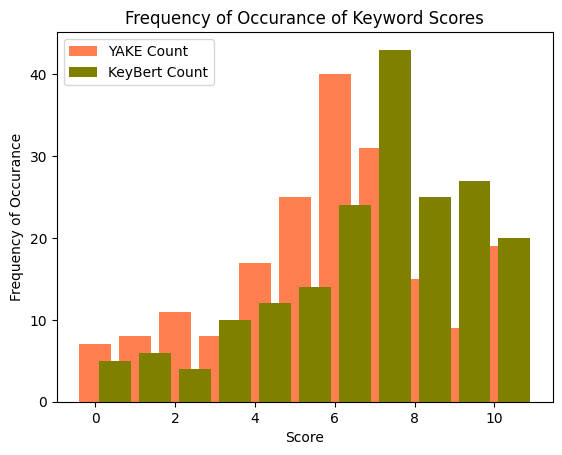

In [11]:
barWidth = 0.5

br1 = np.arange(len(yake_freq))
br2 = [x + barWidth for x in br1]

plt.bar(br1, yake_freq, color='coral', label='YAKE Count')
plt.bar(br2, keybert_freq, color='olive', label='KeyBert Count')
plt.xlabel("Score")
plt.ylabel("Frequency of Occurance")
plt.legend()
plt.title("Frequency of Occurance of Keyword Scores")
plt.show()

# NER Graphs

In [12]:
cambert_freq = [0]*11
spacy_freq = [0]*11
nltk_freq = [0]*11

marks = np.arange(0, 11)

cambert_score = df["Score_camembert"]
nltk_score = df["Score_NLTK"]
spacy_score = df["Score_spacy"]

for i in cambert_score:
    cambert_freq[int(i)] += 1

for i in nltk_score:
    nltk_freq[int(i)] += 1

for i in spacy_score:
    spacy_freq[int(i)] += 1

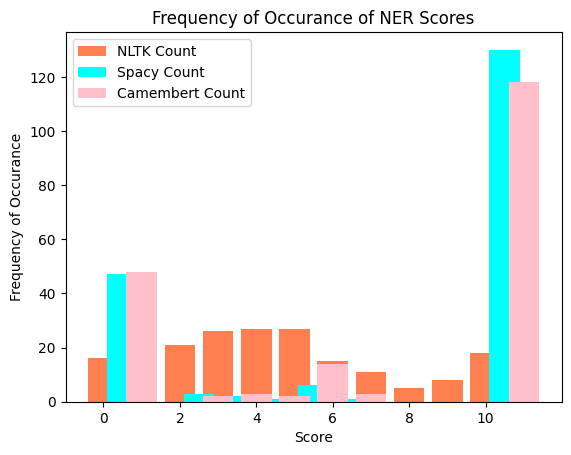

In [13]:
barWidth = 0.5

br1 = np.arange(len(cambert_freq))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]


plt.bar(br1, nltk_freq, color='coral', label='NLTK Count')
plt.bar(br2, spacy_freq, color='cyan', label='Spacy Count')
plt.bar(br3, cambert_freq, color='pink', label='Camembert Count')

plt.xlabel("Score")
plt.ylabel("Frequency of Occurance")
plt.legend()
plt.title("Frequency of Occurance of NER Scores")
plt.show()